# 快速上手(2)

## 前言

这是快速上手系列的第二个部分，通过阅读该文档，您将了解bicks的作用，并且能够快速使用上bicks。

## 使用步骤——第二个案例
当您想寻找$k_x=0$情况下的BIC时（这个时候，我们其实是引入了第三个方向的波矢，得考虑混合偏振，单一偏振的模式请参考快速上手1中的案例），必须导入如下的模块：

In [1]:
from bicks.crystalandnumber import PhotonicCrystalSlab, EssentialNumber
from bicks.bicsearch import FindBICsMix

- crystalandnumber中的PhotonicCrystalSlab是用于构造光子晶体（平板）的
- crystalandnumber中的EssentialNumber是用于指定搜寻BIC的$k_y-\omega$空间的
- bicky中的FindBICsMIX就是用来寻找BIC的(因为存在ky，所以是混合偏振的模式，不再是单一的TE或者TM模式)

我们希望通过改变厚度，来寻找光子晶体平板中的BIC，我们设一维光子晶体的介电常数分别为1和4.9（高斯制），两者各占一半（即填充率为0.5），进行如下操作可以生成我们希望得到的光子晶体：

In [2]:
fr = 0.5 # 填充率
ep = [1.0, 4.9] # 两种介电常数
h = 1.2 # 光子晶体平板厚度，以周期a为单位
phcs = PhotonicCrystalSlab(ep, fr, thickness=h) # 生成光子晶体平板，默认周期为1，长度是以周期a为单位的

我们可以通过使用如下的方法，查看光子晶体在一个周期内的空间分布

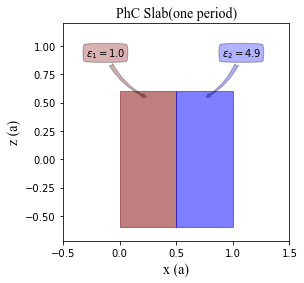

In [3]:
phcs.show()

接下来，您需要指定搜寻BIC的$k_y-\omega$空间，指定的方式就是告诉这个程序你想找的BIC在相应的$k_y-\omega$空间，每种偏振模式有多少个辐射通道

In [4]:
n_radiation_channel = 1 # 辐射通道的个数
num = EssentialNumber(n_radiation=n_radiation_channel) # 创建一个“必要数字”的实例，这是划分区域的关键

在开始搜寻之前，还有最后一步，就是指定偏振模式，这里我们是混合偏振，所以在最开始导入BIC搜寻器的类的时候我们导入的是混合模式的搜寻器，即FindBICMix，所以我们可以直接构建一个BIC搜寻器的实例：

In [5]:
q = 0 # q 就是这里的kx，也就是布洛赫波矢
fb = FindBICsMix(phcs, num, q) # 由光子晶体、划分的区域以及q=0构建的BIC搜寻器

Initializing:
100%[**************************************************->]4.64s
Initialization accomplished.
Meshing:
100%[**************************************************->]0.07s
Mesh accomplished.


初始化需要耗时5s的样子，请耐心等待一会儿，接下来便可以寻找这种光子晶体平板中的BIC了：

Searching:
100%[**************************************************->]16.88s
Search accomplished.
Number of BICs found:  1


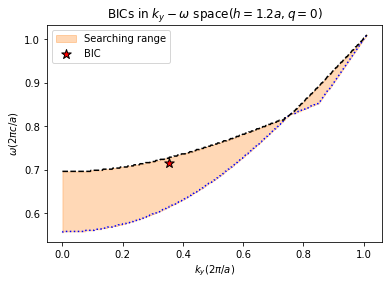

In [6]:
fb.run()

BIC的信息也被存储在搜索器中：

In [7]:
bic_ky = fb.bic_kys
bic_k0 = fb.bic_k0s
print("for this PhC slab, BICs are: ")
print("==========")
print("ky: ", bic_ky)
print("k0: ", bic_k0)

for this PhC slab, BICs are: 
ky:  [0.35500000000000004]
k0:  [0.7166687687235693]
